In [1]:
# Let's have numpy and visualizations
import datetime
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import peewee as pw
import time
def show_raw(nd_array):
    """Simply show the data"""
    from matplotlib.pyplot import imshow, show
    imshow(nd_array)  # interpolation="nearest")
    show()

def plot_time_series(data, first_time, step):
    y = data.ravel()
    x = np.array([first_time +  step * i for i in range(len(y))])
    plt.plot(x,y)
    plt.show()

/home/l/prog/py3.6sys/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


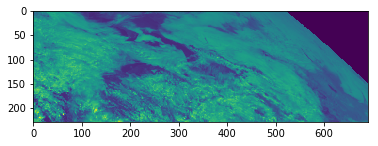

In [2]:
# Let's have 4D data to save / load - in .npy format
data = np.load("slovakia.npy")
# data.shape == (10, 25, 229, 691)
# dimensions: day [0-9], slot [0-24],
#  latitude linspace(49.66, 47.70, 229),
#  longitude linspace(16.81, 22.61, 691)
show_raw(data[0, 12, :, :])  # first day's noon's slot

In [3]:
# Let's have various .nc files
def make_chunked_dataset(ds, chunksizes=None):
    """In .nc file - create dimensions + variable with given chunksizes"""
    ds.createDimension("day", 10)
    ds.createDimension("slot", 25)
    ds.createDimension("latitude", 229)
    ds.createDimension("longitude", 691)
    ds.createVariable(varname="slovakia",
                      datatype=np.int16,
                      dimensions=("day", "slot", "latitude", "longitude"),
                      zlib=True,
                      chunksizes=chunksizes,
                      fill_value=np.iinfo(np.int16).min)

In [4]:
# Let's trace chunking-time dependance
chunkings = [(2,2,229,691),
(2,2,115,346),
(2,2,58,173),
(2,2,29,86),
(2,2,15,43),
(2,2,8,20),
(2,2,8,10),
(4,4,15,43),
(4,4,8,20),
(4,4,8,10),
(4,4,15,43),
(4,8,8,10),
(8,10,4,5),
(8,13,4,5),
(10,25,2,3),
(10,25,1,1),]
for chunking in chunkings:
    f_name = "%d_%d_%d_%d.nc" % chunking
    with nc.Dataset(f_name, "w") as ds:
        make_chunked_dataset(ds, chunksizes=chunking)
        ds["slovakia"][...] = data
for chunking in chunkings:
    f_name = "%d_%d_%d_%d.nc" % chunking
    print("fname times (point, space): ", f_name)
    %timeit nc.Dataset(f_name)["slovakia"][:, :, 179, 231]
    %timeit nc.Dataset(f_name)["slovakia"][-1, 12, 161:190, 329:435]

fname times (point, space):  2_2_229_691.nc
369 ms ± 5.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
933 µs ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
fname times (point, space):  2_2_115_346.nc
95.8 ms ± 1.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
969 µs ± 23.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
fname times (point, space):  2_2_58_173.nc
27.5 ms ± 1.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
948 µs ± 6.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
fname times (point, space):  2_2_29_86.nc
1.7 ms ± 48.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
962 µs ± 10 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
fname times (point, space):  2_2_15_43.nc
1.24 ms ± 8.12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
996 µs ± 27.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
fname times (point, space):  2_2_8_20.nc
1.26 ms ± 6.18 µs per loop (mean ± std. d